# 2 Dimensional Histograms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import matplotlib.ticker as ticker

import cptac
import cptac.utils as u

# Step 1: Get Data Frame and Calculate Std Dev and Mean

Download data frame that has FDR corrected pvalues for all trans proteins. Next, calculate the total number of p values significant for each trans protein. Then calculate the mean and standard deviation of pvalues/ difference in medians across a trans gene. 

In [2]:
root = R'~\Github\WhenMutationsDontMatter\PTEN\Step_3_trans_effect\csv'
df_fdr_pvals = pd.read_csv(root+R"\all_pval_all_proteins.csv")
df_fdr_pvals = df_fdr_pvals.loc[df_fdr_pvals['Proteomics'] != 'PTEN'] # Drop PTEN

# Drop Kidney
cols = []
df_fdr_pvals = df_fdr_pvals.drop(cols)
df_fdr_pvals
len(df_fdr_pvals)


15097

In [5]:

def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05: # changed from .1????
            numSig += 1
            
    return numSig

In [3]:
#Only include genes that have data for at least 6/8 genes.
df_fdr_pvals = df_fdr_pvals.dropna(thresh=12, axis=0)

In [6]:
df_fdr_pvals["Num_sig"] = df_fdr_pvals.loc[:,["Gbm_P_Value","Hnscc_P_Value","Luad_P_Value","Lscc_P_Value", "Brca_P_Value","Ov_P_Value","En_P_Value","Colon_P_Value"]].apply(Pvalue_sig, axis = 1)
df_fdr_pvals = df_fdr_pvals.sort_values(by=['Num_sig'],ascending=False)
df_fdr_pvals

,Proteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Lscc_P_Value,Lscc_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,En_P_Value,En_Median,Colon_P_Value,Colon_Median,Num_sig
1132,RIF1,0.021298,0.360544,0.038812,0.468772,0.999320,0.23970,0.999848,0.13570,0.723699,0.28535,0.985704,0.117336,0.001590,-0.54640,0.953484,-0.1135,3
271,SLK,0.003506,-0.305757,0.005300,-0.443020,0.043043,-0.52600,0.083806,-0.61615,0.375369,-0.51380,0.985704,-0.122267,0.074890,0.40530,0.624087,-0.1814,3
650,NUF2,0.009780,0.999942,0.023883,0.672025,0.569117,1.69920,0.999848,0.13015,0.487632,0.42865,0.997950,-0.079618,0.034789,-0.61250,NaN,NaN,3
1439,TPX2,0.031690,0.640139,0.039944,0.490643,0.778198,0.18745,0.999848,-0.10280,0.462570,-0.05995,0.985704,0.216007,0.021371,-0.80000,0.963829,-0.0305,3
1856,PTPRC,0.048137,-0.715419,0.011761,-0.759050,0.039512,-1.23705,0.999848,0.25000,0.925261,-0.17745,0.985704,0.127666,0.556641,-0.23800,0.926083,-0.0099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,SLC4A1,0.302024,-0.404558,0.585275,-0.302099,0.724646,-0.39875,0.999848,0.16660,0.443309,-1.10290,0.991374,-0.597169,0.842187,0.38100,0.868297,0.2830,0
5127,SERPIND1,0.301334,-0.464742,0.316514,-0.307279,0.318870,-0.49895,0.999848,-0.05520,0.493399,-0.48955,0.985704,0.205481,0.435570,0.17900,0.987216,0.0090,0
5126,EMC2,0.301334,0.121113,0.348623,0.060871,0.461915,0.29065,0.999848,0.11970,0.767521,0.28710,0.985704,0.066198,0.923632,-0.00180,0.854580,-0.0946,0
5123,PC,0.301295,-0.301898,0.467900,0.001199,0.301530,1.43660,0.999848,-0.92235,0.897763,-0.00830,0.985704,0.218755,0.907455,0.06344,0.917530,-0.0725,0


In [7]:
#Calculate mean and standard deviation for pvalues and Pearson Correlations
df_fdr_pvals["Standard_Deviation_P_value"] = df_fdr_pvals.loc[:,["Gbm_P_Value","Hnscc_P_Value","Luad_P_Value","Lscc_P_Value", "Brca_P_Value","Ov_P_Value","En_P_Value","Colon_P_Value"]].std(axis = 1)
df_fdr_pvals["Mean_P_value"] = df_fdr_pvals.loc[:,["Gbm_P_Value","Hnscc_P_Value","Luad_P_Value","Lscc_P_Value", "Brca_P_Value","Ov_P_Value","En_P_Value","Colon_P_Value"]].mean(axis = 1)
df_fdr_pvals["Standard_Deviation_Change_In_Medians"] = (df_fdr_pvals.loc[:,["Gbm_Median","Hnscc_Median","Luad_Median","Lscc_Median", "Brca_Median","Ov_Median","En_Median","Colon_Median"]].std(axis = 1))
df_fdr_pvals["Mean_Change_In_Medians"] = (df_fdr_pvals.loc[:,["Gbm_Median","Hnscc_Median","Luad_Median","Lscc_Median", "Brca_Median","Ov_Median","En_Median","Colon_Median"]].mean(axis = 1))



In [8]:
#Keep trans genes that are significant in atleast 1 cancer. 

df_fdr_pvals_1 = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([1,2,3,4,5,6,7,8])]
len(df_fdr_pvals_1.Proteomics.unique())

2333

In [31]:
min_delta_median = df_fdr_pvals_1['Mean_Change_In_Medians'].min()
max_delta_median = df_fdr_pvals_1['Mean_Change_In_Medians'].max()
print('differential expression','\nmin:', min_delta_median, '\nmax:', max_delta_median)

differential expression 
min: -0.7788234963965195 
max: 1.1937473877541525


In [32]:
min_sd = df_fdr_pvals_1['Standard_Deviation_Change_In_Medians'].min()
max_sd = df_fdr_pvals_1['Standard_Deviation_Change_In_Medians'].max()
print('std dev','\nmin:', min_sd, '\nmax:', max_sd)

std dev 
min: 0.05183323564694836 
max: 1.8239399320562673


In [71]:
a = 0.16
hl = df_fdr_pvals_1[(df_fdr_pvals_1['Mean_Change_In_Medians'] > a) | (df_fdr_pvals_1['Mean_Change_In_Medians'] < -a) ]
sd = hl.loc[hl['Standard_Deviation_Change_In_Medians'] < 0.16]
sd[['Proteomics', 'Standard_Deviation_Change_In_Medians', 'Mean_Change_In_Medians']]

,Proteomics,Standard_Deviation_Change_In_Medians,Mean_Change_In_Medians
108,MAST3,0.158326,-0.160033
63,BORCS5,0.130384,-0.170806
6737,CDK17,0.158189,-0.172790
3996,WAPL,0.129749,-0.229315
8782,ATAD2B,0.115796,0.180256
9094,ZC3H12A,0.154597,-0.194595
5922,TFEB,0.097368,-0.161099
2770,LCAT,0.135016,-0.182310
461,FAM45A,0.156492,-0.203288
217,IFITM3,0.135669,-0.202156


In [111]:
gene = 'MMS19' 
#gene = 'TFEB'
#gene = 'WAPL'
gene_df = df_fdr_pvals.loc[df_fdr_pvals['Proteomics'] == gene]
sd_stats = gene_df[['Proteomics','Mean_Change_In_Medians', 'Standard_Deviation_Change_In_Medians']]
print(sd_stats)
gene_df.iloc[:,::2].drop(columns=['Standard_Deviation_P_value', 'Standard_Deviation_Change_In_Medians'])
#gene_df.iloc[:,4:]

   Proteomics  Mean_Change_In_Medians  Standard_Deviation_Change_In_Medians
66      MMS19               -0.326102                              0.218981


,Proteomics,Gbm_Median,Hnscc_Median,Luad_Median,Lscc_Median,Brca_Median,Ov_Median,En_Median,Colon_Median
66,MMS19,-0.324287,-0.123084,-0.62,-0.35665,-0.6534,-0.324897,-0.0847,-0.1218


In [76]:
sd['Mean_Change_In_Medians'].max()

0.1802556268332242

In [73]:
sd['Mean_Change_In_Medians'].min()

-0.22931540720562485

In [78]:
print('lowest std dev:')
sd['Standard_Deviation_Change_In_Medians'].min()

lowest std dev:


0.09736817279241995

# Step 2: Plot 2D Histogram

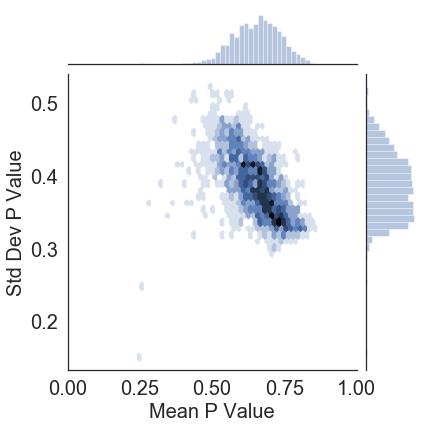

In [13]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals_1, kind="hex", bins = 10)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=20))
g.ax_marg_x.set_xlim(0, 1)
#g.ax_marg_y.set_ylim(.1, .6)
plt.show()
g.savefig("PTEN_Fig_1C_Pvalue_sig_atleast1_cancer.png", dpi = 300)

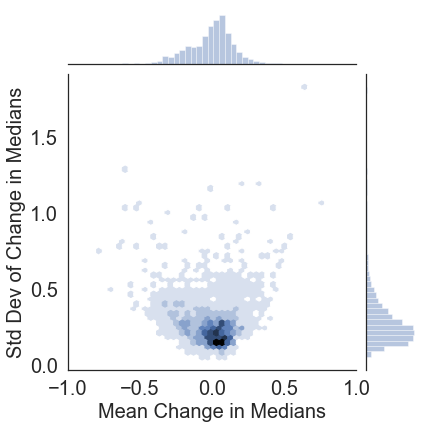

In [14]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Change_In_Medians","Standard_Deviation_Change_In_Medians",data = df_fdr_pvals_1, kind="hex", bins = 10)
        .set_axis_labels("Mean Change in Medians", "Std Dev of Change in Medians", fontsize=20))

g.ax_marg_x.set_xlim(-1, 1)
#g.ax_marg_y.set_ylim(0, 1)

g.savefig("PTEN_Fig_1C_medians_atleast1_cancer.png", dpi = 300)
plt.show()